In [1]:
# ECE 273 Project 2.2 Figure 3(a)

import numpy as np
import scipy, scipy.ndimage
import cvxpy as cp
import matplotlib.pyplot as plt

In [94]:
def circular_convolution(w, x):
    L = len(w)
    y = np.zeros(L)
    for i in range(L):
        y[i] = sum(w[j] * x[i-j]
                   for j in range(L))
    return y

def checking_y_hat(B_hat, C_hat, h, m, y_hat):
    y_hatt = np.zeros(L, dtype=complex)
    for i in range(L):
        tmp = np.outer(np.sqrt(L)*C_hat[i,:], B_hat[i,:])
        y_hatt[i] = np.trace( tmp @ np.outer(h,m) )
    if np.linalg.norm(y_hat-y_hatt) > 1e-10:
        print('difference of y_hat: ', np.linalg.norm(y_hat-y_hatt))
    
def cvx(L, K, N, B_hat, C_hat, y_hat):
    X = cp.Variable((K,N))

    objective = cp.Minimize(cp.norm(X, 'nuc'))
    constraints = [
        cp.trace( np.outer(np.sqrt(L)*C_hat[i,:], B_hat[i,:]) @ X ) == y_hat[i] 
        for i in range(L)
    ]
    prob = cp.Problem(objective, constraints)
    prob.solve(verbose=False)
    
    return X

def error_rate(X, B, C, w, x):
    if X.value is None:
        print('No X')
        return 1
    
    X = X.value
    h_ = X[:,0] / np.linalg.norm(X[:,0])
    m_ = X[0,:] / h_[0]
    
    w_ = np.dot(B, h_)
    x_ = np.dot(C, m_)
    
    X_ = np.outer(w_, x_)
    err = np.linalg.norm(X_ - np.outer(w, x)) / np.linalg.norm(np.outer(w, x))
    return err

def experiment(L, K, N, F, R):
    errs = np.zeros(R)
    for i in range(R):
        # (a)
#         r = np.random.choice(L, K)
#         B = np.eye(L)[:,r]
        # (b)
        B = np.eye(L)[:,0:K]
        
        C = np.random.normal(0, np.sqrt(1/L), (L, N))

        h = np.random.normal(0, 1, K)
        m = np.random.normal(0, 1, N)

        w = np.dot(B, h)
        x = np.dot(C, m)
        y = circular_convolution(w, x)

        B_hat = np.dot(F,B)
        C_hat = np.dot(F,C)
        y_hat = np.dot(F,y)

        # checking_y_hat(B_hat, C_hat, h, m, y_hat)

        X = cvx(L, K, N, B_hat, C_hat, y_hat)

        errs[i] = error_rate(X, B, C, w, x)

    success_rate = sum(np.array(errs < 0.02)) / R
    return success_rate

In [96]:
%%time
L, K, N = 60, 40, 40
F = 1/np.sqrt(L) * scipy.linalg.dft(L)
R = 20 # number of experiments with the same L, K, N
step = 1

result = []
for k in range(2, K+step, step):
    tmp = []
    for n in range(2, N+step, step):
        
        # skip
        if len(tmp)>3 and (tmp[-1]+tmp[-2]+tmp[-3])<0.15:
            print('K=', '%2d' %k, ' N=', '%2d' %n, ' rate: ---')
            tmp.append(0)
            continue
        # 
        
        success_rate = experiment(L, k, n, F, R)
        print('K=', '%2d' %k, ' N=', '%2d' %n, ' rate:', success_rate)
        tmp.append(success_rate)
        
    result.append(tmp)

K=  2  N=  2  rate: 1.0
K=  2  N=  3  rate: 1.0
K=  2  N=  4  rate: 1.0
K=  2  N=  5  rate: 1.0
K=  2  N=  6  rate: 1.0
K=  2  N=  7  rate: 1.0
K=  2  N=  8  rate: 1.0
K=  2  N=  9  rate: 1.0
K=  2  N= 10  rate: 1.0
K=  2  N= 11  rate: 1.0
K=  2  N= 12  rate: 1.0
K=  2  N= 13  rate: 1.0
K=  2  N= 14  rate: 1.0
K=  2  N= 15  rate: 1.0
K=  2  N= 16  rate: 1.0
K=  2  N= 17  rate: 1.0
K=  2  N= 18  rate: 1.0
K=  2  N= 19  rate: 1.0
K=  2  N= 20  rate: 1.0
K=  2  N= 21  rate: 1.0
K=  2  N= 22  rate: 1.0
K=  2  N= 23  rate: 1.0
K=  2  N= 24  rate: 1.0
K=  2  N= 25  rate: 1.0
K=  2  N= 26  rate: 1.0
K=  2  N= 27  rate: 1.0
K=  2  N= 28  rate: 1.0
K=  2  N= 29  rate: 1.0
K=  2  N= 30  rate: 1.0
K=  2  N= 31  rate: 1.0
K=  2  N= 32  rate: 1.0
K=  2  N= 33  rate: 1.0
K=  2  N= 34  rate: 1.0
K=  2  N= 35  rate: 0.95
K=  2  N= 36  rate: 0.8
K=  2  N= 37  rate: 0.65
K=  2  N= 38  rate: 0.55
K=  2  N= 39  rate: 0.45
K=  2  N= 40  rate: 0.25
K=  3  N=  2  rate: 1.0
K=  3  N=  3  rate: 1.0
K=  3  N=  

K= 11  N=  2  rate: 1.0
K= 11  N=  3  rate: 1.0
K= 11  N=  4  rate: 1.0
K= 11  N=  5  rate: 1.0
K= 11  N=  6  rate: 1.0
K= 11  N=  7  rate: 1.0
K= 11  N=  8  rate: 1.0
K= 11  N=  9  rate: 1.0
K= 11  N= 10  rate: 1.0
K= 11  N= 11  rate: 1.0
K= 11  N= 12  rate: 1.0
K= 11  N= 13  rate: 1.0
K= 11  N= 14  rate: 0.85
K= 11  N= 15  rate: 0.85
K= 11  N= 16  rate: 0.7
K= 11  N= 17  rate: 0.5
K= 11  N= 18  rate: 0.55
K= 11  N= 19  rate: 0.4
K= 11  N= 20  rate: 0.1
K= 11  N= 21  rate: 0.15
K= 11  N= 22  rate: 0.05
K= 11  N= 23  rate: 0.0
K= 11  N= 24  rate: 0.0
K= 11  N= 25  rate: ---
K= 11  N= 26  rate: ---
K= 11  N= 27  rate: ---
K= 11  N= 28  rate: ---
K= 11  N= 29  rate: ---
K= 11  N= 30  rate: ---
K= 11  N= 31  rate: ---
K= 11  N= 32  rate: ---
K= 11  N= 33  rate: ---
K= 11  N= 34  rate: ---
K= 11  N= 35  rate: ---
K= 11  N= 36  rate: ---
K= 11  N= 37  rate: ---
K= 11  N= 38  rate: ---
K= 11  N= 39  rate: ---
K= 11  N= 40  rate: ---
K= 12  N=  2  rate: 1.0
K= 12  N=  3  rate: 1.0
K= 12  N=  

K= 20  N=  2  rate: 1.0
K= 20  N=  3  rate: 1.0
K= 20  N=  4  rate: 1.0
K= 20  N=  5  rate: 1.0
K= 20  N=  6  rate: 0.95
K= 20  N=  7  rate: 0.9
K= 20  N=  8  rate: 0.75
K= 20  N=  9  rate: 0.55
K= 20  N= 10  rate: 0.35
K= 20  N= 11  rate: 0.5
K= 20  N= 12  rate: 0.05
K= 20  N= 13  rate: 0.05
K= 20  N= 14  rate: 0.05
K= 20  N= 15  rate: 0.0
K= 20  N= 16  rate: ---
K= 20  N= 17  rate: ---
K= 20  N= 18  rate: ---
K= 20  N= 19  rate: ---
K= 20  N= 20  rate: ---
K= 20  N= 21  rate: ---
K= 20  N= 22  rate: ---
K= 20  N= 23  rate: ---
K= 20  N= 24  rate: ---
K= 20  N= 25  rate: ---
K= 20  N= 26  rate: ---
K= 20  N= 27  rate: ---
K= 20  N= 28  rate: ---
K= 20  N= 29  rate: ---
K= 20  N= 30  rate: ---
K= 20  N= 31  rate: ---
K= 20  N= 32  rate: ---
K= 20  N= 33  rate: ---
K= 20  N= 34  rate: ---
K= 20  N= 35  rate: ---
K= 20  N= 36  rate: ---
K= 20  N= 37  rate: ---
K= 20  N= 38  rate: ---
K= 20  N= 39  rate: ---
K= 20  N= 40  rate: ---
K= 21  N=  2  rate: 1.0
K= 21  N=  3  rate: 1.0
K= 21  N=

K= 29  N=  2  rate: 1.0
K= 29  N=  3  rate: 0.95
K= 29  N=  4  rate: 0.9
K= 29  N=  5  rate: 0.6
K= 29  N=  6  rate: 0.35
K= 29  N=  7  rate: 0.05
K= 29  N=  8  rate: 0.15
K= 29  N=  9  rate: 0.0
K= 29  N= 10  rate: 0.05
K= 29  N= 11  rate: 0.0
K= 29  N= 12  rate: ---
K= 29  N= 13  rate: ---
K= 29  N= 14  rate: ---
K= 29  N= 15  rate: ---
K= 29  N= 16  rate: ---
K= 29  N= 17  rate: ---
K= 29  N= 18  rate: ---
K= 29  N= 19  rate: ---
K= 29  N= 20  rate: ---
K= 29  N= 21  rate: ---
K= 29  N= 22  rate: ---
K= 29  N= 23  rate: ---
K= 29  N= 24  rate: ---
K= 29  N= 25  rate: ---
K= 29  N= 26  rate: ---
K= 29  N= 27  rate: ---
K= 29  N= 28  rate: ---
K= 29  N= 29  rate: ---
K= 29  N= 30  rate: ---
K= 29  N= 31  rate: ---
K= 29  N= 32  rate: ---
K= 29  N= 33  rate: ---
K= 29  N= 34  rate: ---
K= 29  N= 35  rate: ---
K= 29  N= 36  rate: ---
K= 29  N= 37  rate: ---
K= 29  N= 38  rate: ---
K= 29  N= 39  rate: ---
K= 29  N= 40  rate: ---
K= 30  N=  2  rate: 1.0
K= 30  N=  3  rate: 0.95
K= 30  N= 

K= 38  N=  2  rate: 0.7
K= 38  N=  3  rate: 0.35
K= 38  N=  4  rate: 0.1
K= 38  N=  5  rate: 0.1
K= 38  N=  6  rate: 0.0
K= 38  N=  7  rate: 0.0
K= 38  N=  8  rate: ---
K= 38  N=  9  rate: ---
K= 38  N= 10  rate: ---
K= 38  N= 11  rate: ---
K= 38  N= 12  rate: ---
K= 38  N= 13  rate: ---
K= 38  N= 14  rate: ---
K= 38  N= 15  rate: ---
K= 38  N= 16  rate: ---
K= 38  N= 17  rate: ---
K= 38  N= 18  rate: ---
K= 38  N= 19  rate: ---
K= 38  N= 20  rate: ---
K= 38  N= 21  rate: ---
K= 38  N= 22  rate: ---
K= 38  N= 23  rate: ---
K= 38  N= 24  rate: ---
K= 38  N= 25  rate: ---
K= 38  N= 26  rate: ---
K= 38  N= 27  rate: ---
K= 38  N= 28  rate: ---
K= 38  N= 29  rate: ---
K= 38  N= 30  rate: ---
K= 38  N= 31  rate: ---
K= 38  N= 32  rate: ---
K= 38  N= 33  rate: ---
K= 38  N= 34  rate: ---
K= 38  N= 35  rate: ---
K= 38  N= 36  rate: ---
K= 38  N= 37  rate: ---
K= 38  N= 38  rate: ---
K= 38  N= 39  rate: ---
K= 38  N= 40  rate: ---
K= 39  N=  2  rate: 0.85
K= 39  N=  3  rate: 0.45
K= 39  N=  4 

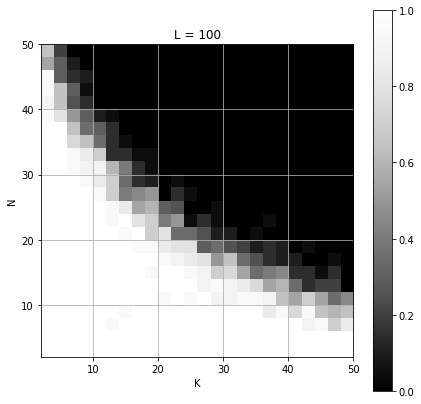

In [103]:
# Plot the result (a)
# ra = np.array(result)
# ra = ra.T

plt.figure(figsize=(7,7))
plt.title("L = 100")
plt.xlabel("K")
plt.ylabel("N")
plt.grid()
plt.imshow(ra, cmap='Greys_r', origin='lower', extent=[2,50,2,50])
plt.colorbar()
plt.show()

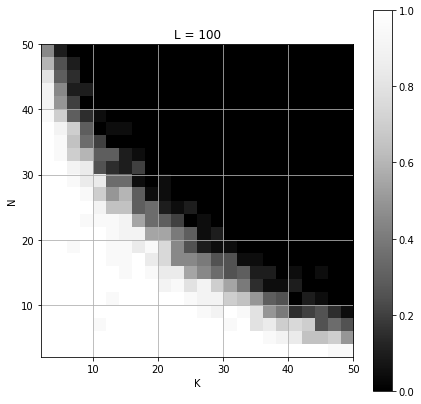

In [102]:
# Plot the result (b)
# rb = np.array(result)
# rb = rb.T

plt.figure(figsize=(7,7))
plt.title("L = 100")
plt.xlabel("K")
plt.ylabel("N")
plt.grid()
plt.imshow(rb, cmap='Greys_r', origin='lower', extent=[2,50,2,50])
plt.colorbar()
plt.show()

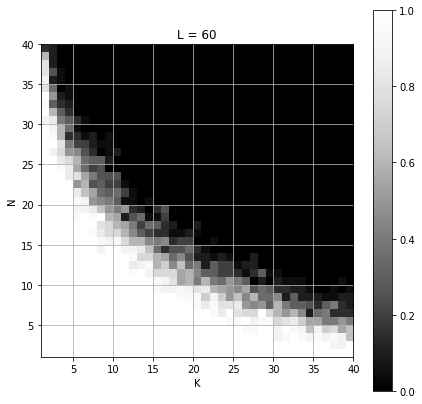

In [104]:
# Plot the result (a)
# raa = np.array(result)
# raa = raa.T

plt.figure(figsize=(7,7))
plt.title("L = 60")
plt.xlabel("K")
plt.ylabel("N")
plt.grid()
plt.imshow(raa, cmap='Greys_r', origin='lower', extent=[1,40,1,40])
plt.colorbar()
plt.show()

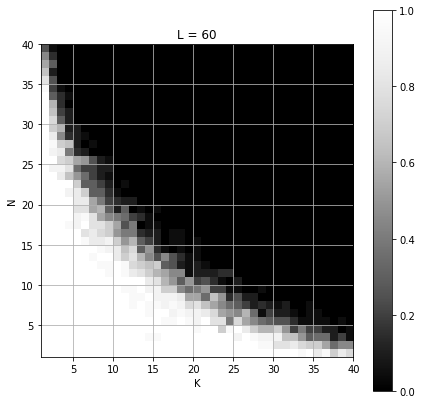

In [105]:
# Plot the result (a)
# rbb = np.array(result)
# rbb = rbb.T

plt.figure(figsize=(7,7))
plt.title("L = 60")
plt.xlabel("K")
plt.ylabel("N")
plt.grid()
plt.imshow(rbb, cmap='Greys_r', origin='lower', extent=[1,40,1,40])
plt.colorbar()
plt.show()

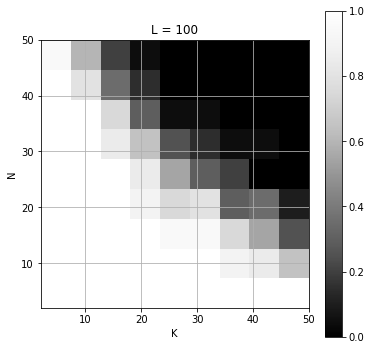

In [77]:
# Plot the result test
r = np.array(result)
r = r.T

plt.figure(figsize=(6,6))
plt.title("L = 50")
plt.xlabel("K")
plt.ylabel("N")
plt.grid()
plt.imshow(r, cmap='Greys_r', origin='lower', extent=[4,20,4,20])
plt.colorbar()
plt.show()